<p style="text-align:center; font-family: Arial; font-size:3.0em;color:blue; font-style:bold"><br>
Example: Nonlinear Regession 
</p><br>

  Let us fits both of the following functions to the data:
  
  
  
\begin{matrix}
\text{t (sec)} & 0 & 0.3 & 0.8 & 1.1 & 1.6 & 2.3 & 3\\
\text{v (volts)} & 0 & 0.6 & 1.28 & 1.5 & 1.7 & 1.75 & 1.8
\end{matrix}


and determine which fits best by plotting the residuals
\begin{align}
v  &  =a_{1}+a_{2}e^{-3t/T_{1}}\label{neqn:1n}\\
v  &  =b_{1}+b_{2}e^{-3t/T_{1}}+b_{3}te^{-3t/T_{2}}\text{.} \label{neqn:2n}%
\end{align}
where $T$ is the time required for $v(t)$ to reach 95\% its final value. You
may take $T_{1}=T_{2}=3$.

In [1]:



import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


We define the interpolation (least quares) fitted function for both models given inputs of the value used ofr $T$ and the data input. We fit the data values by trying to demand that:
$$
v\left(  t_{i}\right)  =v_{i}\quad\text{for all data values }\left(
t_{i},v_{i}\right) .  
$$
This means  we try and fit the model by solving the system
of equations: 
$$
\left(
\begin{array}
[c]{cc}
1 & e^{-3t_{1}/T_{1}}\\
1 & e^{-3t_{2}/T_{1}}\\
\vdots & \vdots\\
1 & e^{-3t_{7}/T_{1}}%
\end{array}
\right)  \left(
\begin{array}
[c]{c}%
a_{1}\\
a_{2}%
\end{array}
\right)  =\left(
\begin{array}
[c]{c}%
v_{1}\\
v_{2}\\
\vdots\\
v_{7}%
\end{array}
\right)
$$
for $\left(  a_{1},a_{2}\right)  $ and for the second model we solve the
system
$$
\left(
\begin{array}
[c]{ccc}%
1 & e^{-3t_{1}/T_{1}} & t_{1}e^{-3t_{1}/T_{2}}\\
1 & e^{-3t_{2}/T_{1}} & t_{2}e^{-3t_{2}/T_{2}}\\
\vdots & \ddots & \vdots\\
1 & e^{-3t_{7}/T_{1}} & t_{7}e^{-3t_{7}/T_{2}}
\end{array}
\right)  \left(
\begin{array}
[c]{c}
b_{1}\\
b_{2}\\
b_{3}
\end{array}
\right)  =\left(
\begin{array}
[c]{c}
v_{1}\\
v_{2}\\
\vdots\\
v_{7}
\end{array}
\right)
$$
for $\left(  b_{1},b_{2},b_{3}\right)  $. We need to solve this over
determined system in the least squares sense.   We can run a script like the following: 

In [2]:
def expfitfun1(T, x, y):
    X1 = np.vstack((np.ones(len(x)), np.exp(-np.array(x)/T))).T
    a = np.linalg.lstsq(X1, y, rcond=None)[0]
    u = np.arange(0, 3.01, 0.01)
    v1 = np.vstack((np.ones(len(u)), np.exp(-u/T))).T @ a
    res1 = y - X1 @ a
    resid = np.linalg.norm(res1, 2)**2
    return resid, res1, a, v1

def expfitfun2(T, x, y):
    X2 = np.vstack((np.ones(len(x)), np.exp(-np.array(x)/T[0]), np.array(x)*np.exp(-np.array(x)/T[1]))).T
    b = np.linalg.lstsq(X2, y, rcond=None)[0]
    u = np.arange(0, 3.01, 0.01)
    v2 = np.vstack((np.ones(len(u)), np.exp(-u/T[0]), u*np.exp(-u/T[1]))).T @ b
    res2 = y - X2 @ b
    resid = np.linalg.norm(res2, 2)**2
    return resid, res2, b, v2


We input the data, define a value for $T$, solve for the least quares models and plot he results.

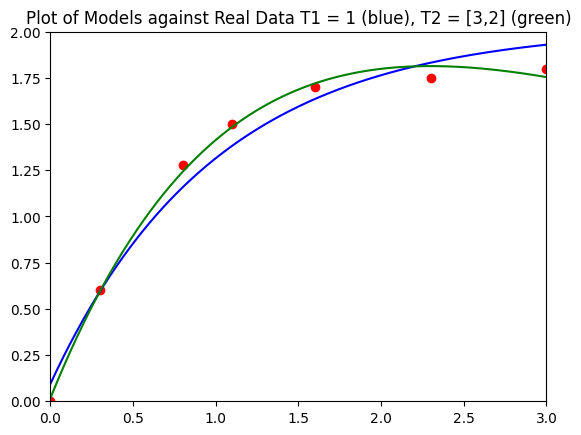

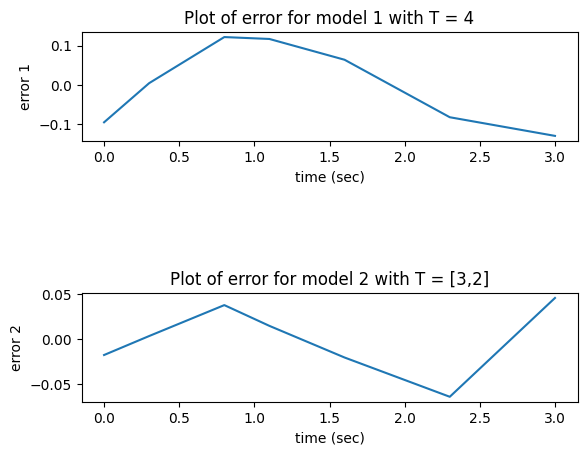

In [3]:
x = np.array([0, 0.3, 0.8, 1.1, 1.6, 2.3, 3])
y = np.array([0, 0.6, 1.28, 1.5, 1.7, 1.75, 1.8])

T1 = 1
T2 = np.array([3, 2])
u = np.arange(0, 3.01, 0.01)

_, res1, a, v1 = expfitfun1(T1, x, y)
_, res2, b, v2 = expfitfun2(T2, x, y)

plt.figure()
plt.plot(x, y, 'ro')
plt.axis([0, 3, 0, 2])
plt.plot(u, v1, 'b-', u, v2, 'g-')
plt.title('Plot of Models against Real Data T1 = 1 (blue), T2 = [3,2] (green)')
plt.show()

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(x, res1)
plt.xlabel('time (sec)')
plt.ylabel('error 1')
plt.title('Plot of error for model 1 with T = 4')

plt.subplot(3, 1, 3)
plt.plot(x, res2)
plt.xlabel('time (sec)')
plt.ylabel('error 2')
plt.title('Plot of error for model 2 with T = [3,2]')
plt.show()


We may improved this fitting by optimising over the choice of values for $T$.
That is we want to find the optimal values of $\left[  T_{1},T_{2}\right] $.
The following will do the job (where we use the inbuilt
optimiser which is a derivative free method). We then plot te result for both models and report the $r^2$ values and  teh best model fit. 

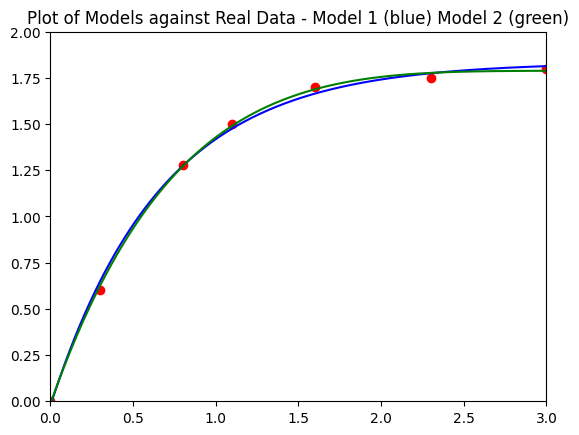

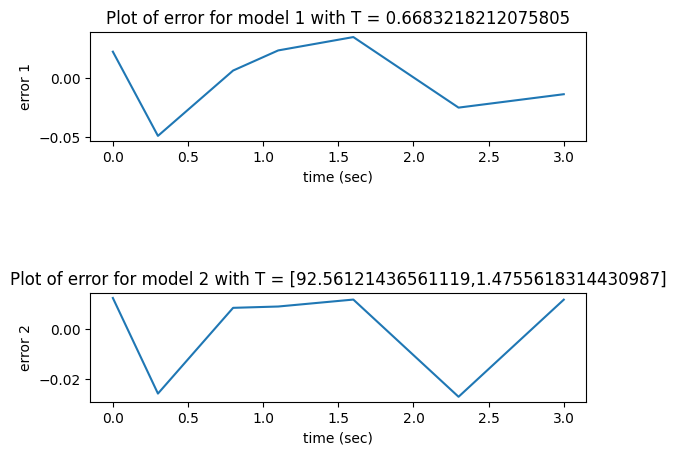

Model 2 was a better fit with r^2 = 0.999298706


In [4]:
T3 = minimize(lambda T: expfitfun1(T[0], x, y)[0], T1).x[0]
T4 = minimize(lambda T: expfitfun2([T[0], T[1]], x, y)[0], T2).x

_, res3, a2, v3 = expfitfun1(T3, x, y)
_, res4, b2, v4 = expfitfun2(T4, x, y)

plt.figure()
plt.plot(x, y, 'ro')
plt.axis([0, 3, 0, 2])
plt.plot(u, v3, 'b-', u, v4, 'g-')
plt.title('Plot of Models against Real Data - Model 1 (blue) Model 2 (green)')
plt.show()

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(x, res3)
plt.xlabel('time (sec)')
plt.ylabel('error 1')
plt.title(f'Plot of error for model 1 with T = {T3}')

plt.subplot(3, 1, 3)
plt.plot(x, res4)
plt.xlabel('time (sec)')
plt.ylabel('error 2')
plt.title(f'Plot of error for model 2 with T = [{T4[0]},{T4[1]}]')
plt.show()

mu = np.mean(y)
r1 = 1 - np.sum(res3**2) / np.sum((y - mu)**2)
r2 = 1 - np.sum(res4**2) / np.sum((y - mu)**2)

if r2 > r1:
    print(f"Model 2 was a better fit with r^2 = {r2:.9f}")
else:
    print(f"Model 1 was a better fit with r^2 = {r1:.9f}")